In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
#3rd assessment - Support vector machine classification
df2 = pd.read_excel(r"C:\Users\rajha\Downloads\Data set.xlsx", sheet_name=2)
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [3]:
## data processing by handling missing values data is huge so we can delete the null 
df2.dropna(inplace=True)

In [4]:
#encoding the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['workclass'] = le.fit_transform(df2['workclass'])
df2['education'] = le.fit_transform(df2['education'])
df2['occupation'] = le.fit_transform(df2['occupation'])
df2['sex'] = le.fit_transform(df2['sex'])
df2['marital-status'] = le.fit_transform(df2['marital-status'])
df2['native-country'] = le.fit_transform(df2['native-country'])
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,Not-in-family,White,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,Husband,White,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,Not-in-family,White,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,Husband,Black,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,Wife,Black,0,0,0,40,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,4,245211,9,13,4,10,Own-child,White,1,0,0,40,39,<=50K.
48837,39,4,215419,9,13,0,10,Not-in-family,White,0,0,0,36,39,<=50K.
48839,38,4,374983,9,13,2,10,Husband,White,1,0,0,50,39,<=50K.
48840,44,4,83891,9,13,0,1,Own-child,Asian-Pac-Islander,1,5455,0,40,39,<=50K.


In [5]:
df2['income'].unique()
income_mapping = {'<=50K': 'Low Income', '>50K': 'High Income', '<=50K.': 'Low Income', '>50K.': 'High Income'}
# Replace the values in the 'income' column using the mapping
df2['new_income'] = df2['income'].replace(income_mapping)

# Check the unique values in the new 'new_income' column
unique_values_mapped = df2['new_income'].unique()
print(unique_values_mapped)

# Modify the 'income' column directly using the mapping
df2['income'].replace(income_mapping, inplace=True)
df2

['Low Income' 'High Income']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,new_income
0,39,7,77516,9,13,4,1,Not-in-family,White,1,2174,0,40,39,Low Income,Low Income
1,50,6,83311,9,13,2,4,Husband,White,1,0,0,13,39,Low Income,Low Income
2,38,4,215646,11,9,0,6,Not-in-family,White,1,0,0,40,39,Low Income,Low Income
3,53,4,234721,1,7,2,6,Husband,Black,1,0,0,40,39,Low Income,Low Income
4,28,4,338409,9,13,2,10,Wife,Black,0,0,0,40,5,Low Income,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,4,245211,9,13,4,10,Own-child,White,1,0,0,40,39,Low Income,Low Income
48837,39,4,215419,9,13,0,10,Not-in-family,White,0,0,0,36,39,Low Income,Low Income
48839,38,4,374983,9,13,2,10,Husband,White,1,0,0,50,39,Low Income,Low Income
48840,44,4,83891,9,13,0,1,Own-child,Asian-Pac-Islander,1,5455,0,40,39,Low Income,Low Income


In [6]:
df2['income'] = le.fit_transform(df2['income'])
df2['income']

0        1
1        1
2        1
3        1
4        1
        ..
48836    1
48837    1
48839    1
48840    1
48841    0
Name: income, Length: 47621, dtype: int32

In [16]:
#support vector machine model using the same dataset
x = df2.drop(["fnlwgt","workclass", "education", "age", "hours-per-week", "income", "new_income", "marital-status", "relationship", "race", "education-num", "capital-gain", "capital-loss", "native-country"], axis="columns")
y = df2['income']
x

,occupation,sex
0,1,1
1,4,1
2,6,1
3,6,1
4,10,0
...,...,...
48836,10,1
48837,10,0
48839,10,1
48840,1,1


In [17]:
# Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Assuming scaler is already defined and fitted on df2
scaled_x = scaler.fit_transform(x)
scaled_df2_x = pd.DataFrame(scaled_x, columns=x.columns)
scaled_df2_x

,occupation,sex
0,-1.368490,0.700779
1,-0.648787,0.700779
2,-0.168985,0.700779
3,-0.168985,0.700779
4,0.790619,-1.426982
...,...,...
47616,0.790619,0.700779
47617,0.790619,-1.426982
47618,0.790619,0.700779
47619,-1.368490,0.700779


In [18]:
x = scaled_df2_x
y = df2['income']

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

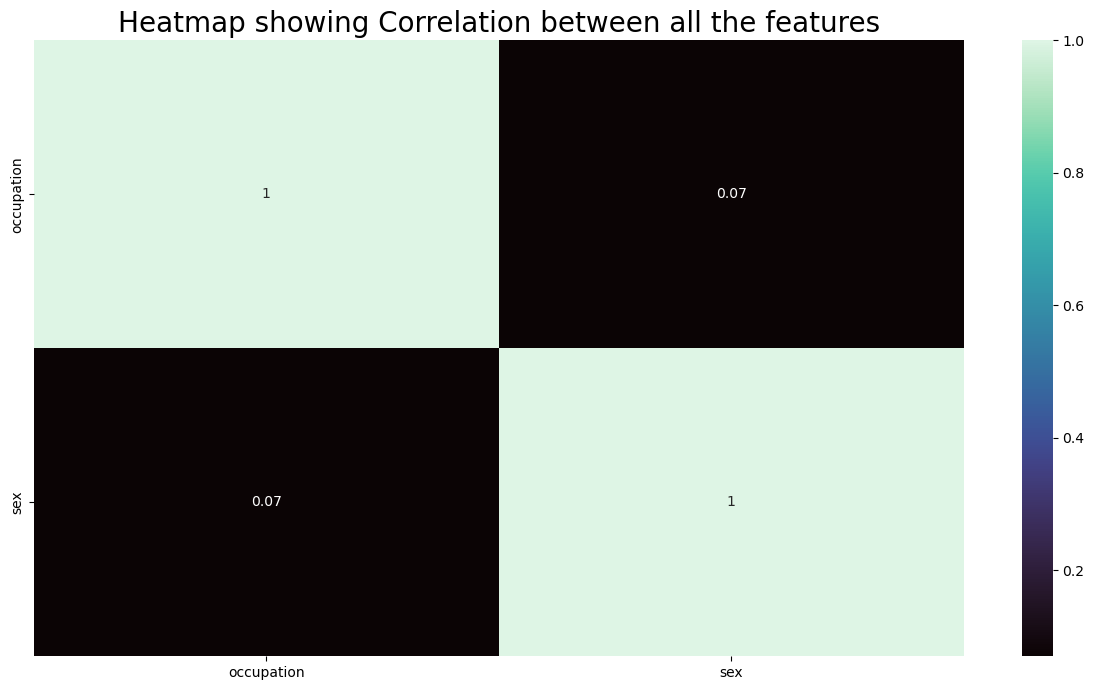

In [19]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between the features", fontsize=20)
sns.heatmap(x.corr(),annot = True, cmap='mako')

In [20]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4,random_state=109)

In [21]:
# Apply SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))  #75% accuracy - linear model

Model accuracy : 0.756


In [24]:
# Apply SVM model using Linear Kernel function 
linear_classifier=SVC(kernel='linear').fit(x_train,y_train)
y_pred = linear_classifier.predict(x_test)
print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred))) #75% accuracy 

Model accuracy with linear kernel : 0.756


In [25]:
# Classification Report
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4639
           1       0.76      1.00      0.86     14410

    accuracy                           0.76     19049
   macro avg       0.38      0.50      0.43     19049
weighted avg       0.57      0.76      0.65     19049



C:\Users\rajha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rajha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Apply SVM model using Gaussian RBF kernel function 
rbf_svc=SVC(kernel='rbf').fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred))) #this model also gives 75%

Model accuracy with rbf kernel : 0.756


comment on svm - 75% accuracy which is good model
